# Using Template-Matching Similarity check

In [5]:
import pandas as pd

# Load the similarity data from file
similarity_df = pd.read_csv('similarity.txt', sep=',', header=None, names=['pokemon1', 'pokemon2', 'similarity'])

# Remove repeating pairs and self-similarity
similarity_df = similarity_df[similarity_df['pokemon1'] != similarity_df['pokemon2']]
similarity_df = similarity_df.drop_duplicates()

# Get a unique list of all Pokemon names
all_pokemon = similarity_df['pokemon1'].unique()

# Create an empty similarity matrix
similarity_matrix = pd.DataFrame(index=all_pokemon, columns=all_pokemon)

# Fill the similarity matrix with similarity scores
for i, row in similarity_df.iterrows():
    similarity_matrix.loc[row['pokemon1'], row['pokemon2']] = row['similarity']

# Replace missing values with 0 (when two Pokemon don't have a similarity score)
similarity_matrix = similarity_matrix.fillna(0)

# Convert the similarity matrix to a numpy array
similarity_array = similarity_matrix.to_numpy()

# Save as csv
similarity_matrix.to_csv('similarity_matrix.csv')


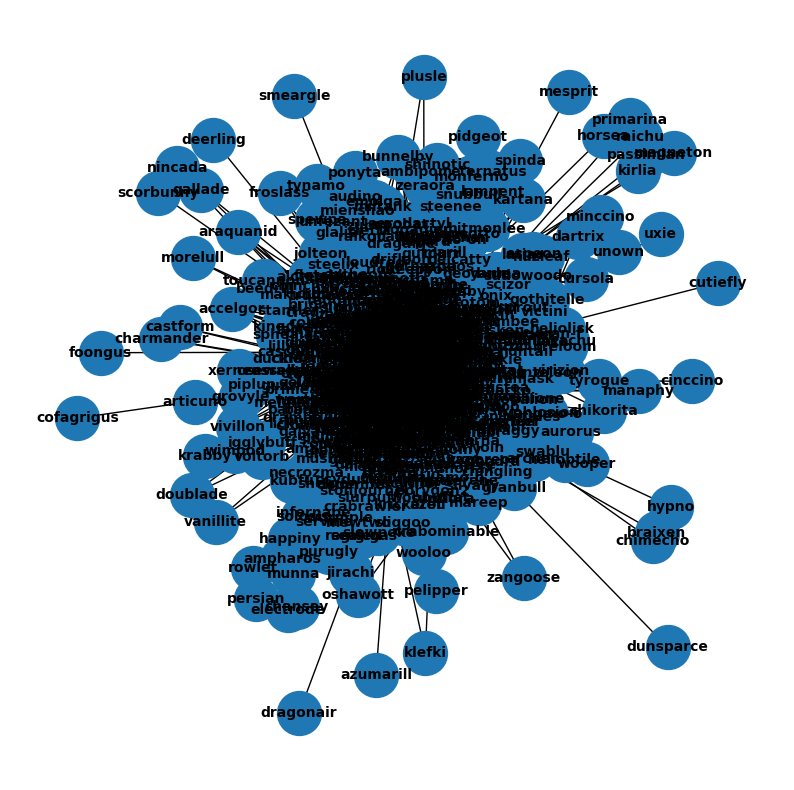

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load the similarity data from file
similarity_df = pd.read_csv('similarity_matrix.csv', index_col=0)

# Filter out non-significant edges
threshold = 0.3
similarity_df[similarity_df < threshold] = 0

# Create a graph from the similarity data
G = nx.from_numpy_array(similarity_df.values)

# Set the node labels
node_labels = dict(zip(range(len(similarity_df.index)), similarity_df.index))
nx.relabel_nodes(G, node_labels, copy=False)

# Remove nodes with no edges
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, with_labels=True, node_size=1000, font_size=10, font_weight='bold')
plt.axis('off')
plt.show()


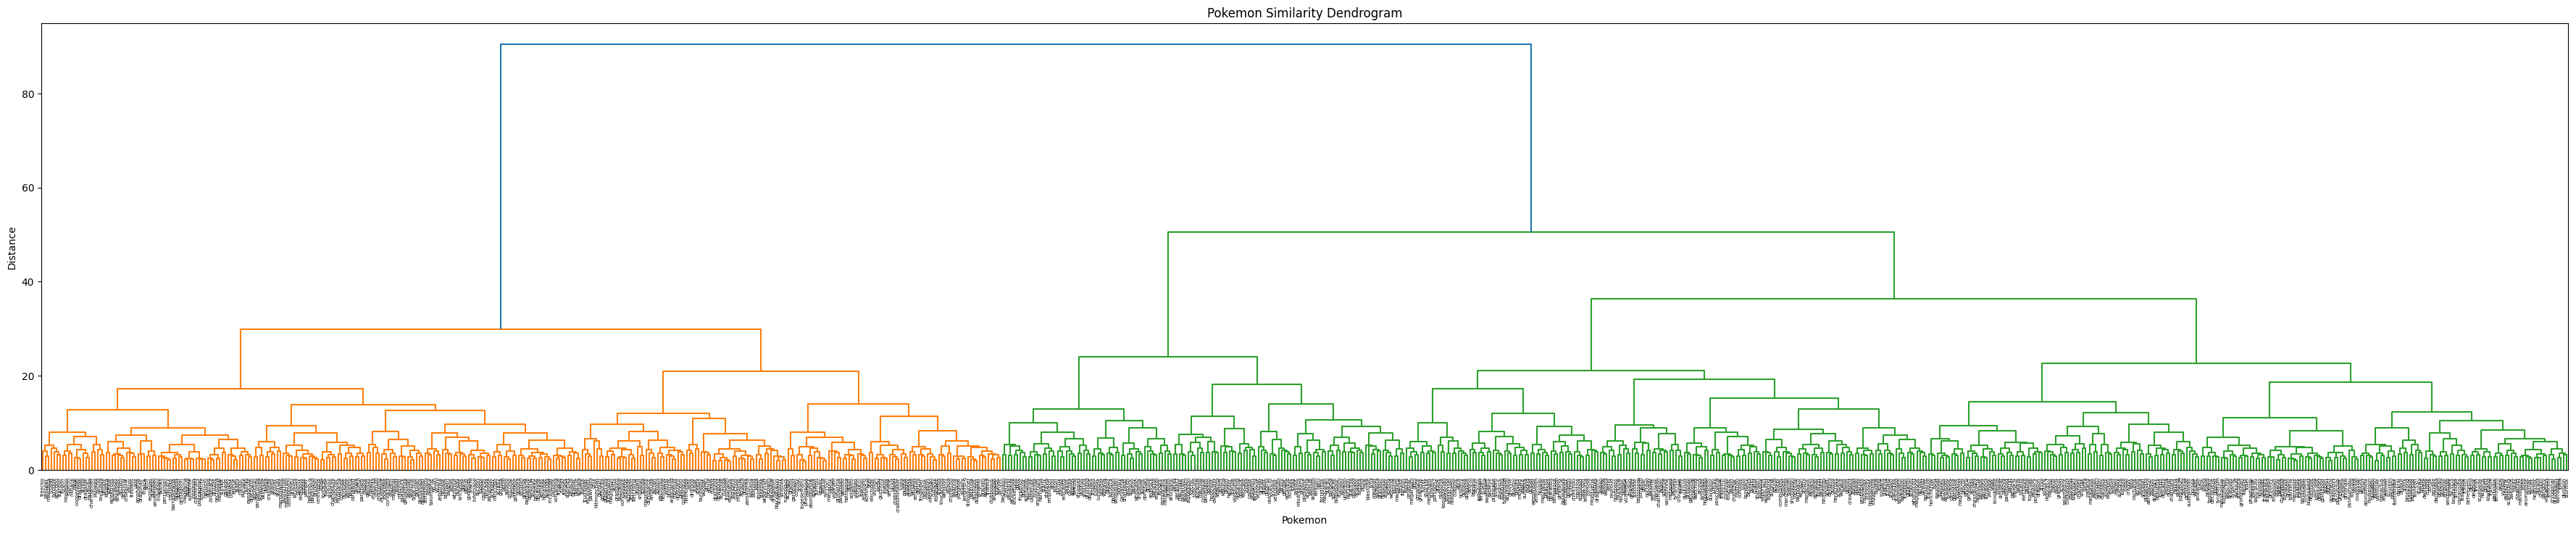

In [12]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Load the similarity data from file
similarity_matrix = pd.read_csv('similarity_matrix.csv', index_col=0)

# Set the upper triangular part of the matrix to 0
similarity_matrix = similarity_matrix + np.triu(similarity_matrix, k=1)

# Convert the similarity matrix to a distance matrix
distance_matrix = 1 - similarity_matrix.to_numpy()

# Create the linkage matrix using Ward's method
linkage_matrix = linkage(distance_matrix, method='ward')

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(45, 8))
dendrogram(linkage_matrix, labels=similarity_matrix.index, leaf_rotation=90, ax=ax)
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
plt.title('Pokemon Similarity Dendrogram')
plt.xlabel('Pokemon')
plt.ylabel('Distance')
plt.show()
# Save the figure as a high-quality SVG file
fig.savefig('pokemon_similarity_dendrogram.svg', format='svg', dpi=24000, bbox_inches='tight')


# Using Template-matching similarity check in gray scale

In [5]:
import pandas as pd

# Load the similarity data from file
similarity_df = pd.read_csv('gs_similarity.txt', sep=',', header=None, names=['pokemon1', 'pokemon2', 'similarity'])

# Remove repeating pairs and self-similarity
similarity_df = similarity_df[similarity_df['pokemon1'] != similarity_df['pokemon2']]
similarity_df = similarity_df.drop_duplicates()

# Get a unique list of all Pokemon names
all_pokemon = similarity_df['pokemon1'].unique()

# Create an empty similarity matrix
similarity_matrix = pd.DataFrame(index=all_pokemon, columns=all_pokemon)

# Fill the similarity matrix with similarity scores
for i, row in similarity_df.iterrows():
    similarity_matrix.loc[row['pokemon1'], row['pokemon2']] = row['similarity']

# Replace missing values with 0 (when two Pokemon don't have a similarity score)
similarity_matrix = similarity_matrix.fillna(0)

# Convert the similarity matrix to a numpy array
similarity_array = similarity_matrix.to_numpy()

# Save as csv
similarity_matrix.to_csv('gs_similarity_matrix.csv')


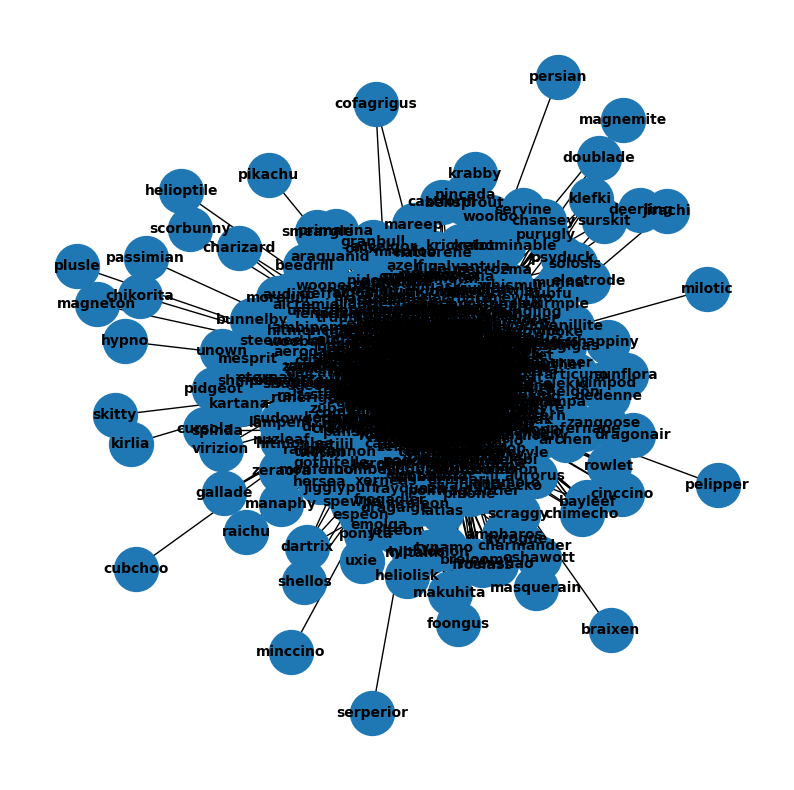

In [6]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load the similarity data from file
similarity_df = pd.read_csv('gs_similarity_matrix.csv', index_col=0)

# Filter out non-significant edges
threshold = 0.3
similarity_df[similarity_df < threshold] = 0

# Create a graph from the similarity data
G = nx.from_numpy_array(similarity_df.values)

# Set the node labels
node_labels = dict(zip(range(len(similarity_df.index)), similarity_df.index))
nx.relabel_nodes(G, node_labels, copy=False)

# Remove nodes with no edges
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, with_labels=True, node_size=1000, font_size=10, font_weight='bold')
plt.axis('off')
plt.show()

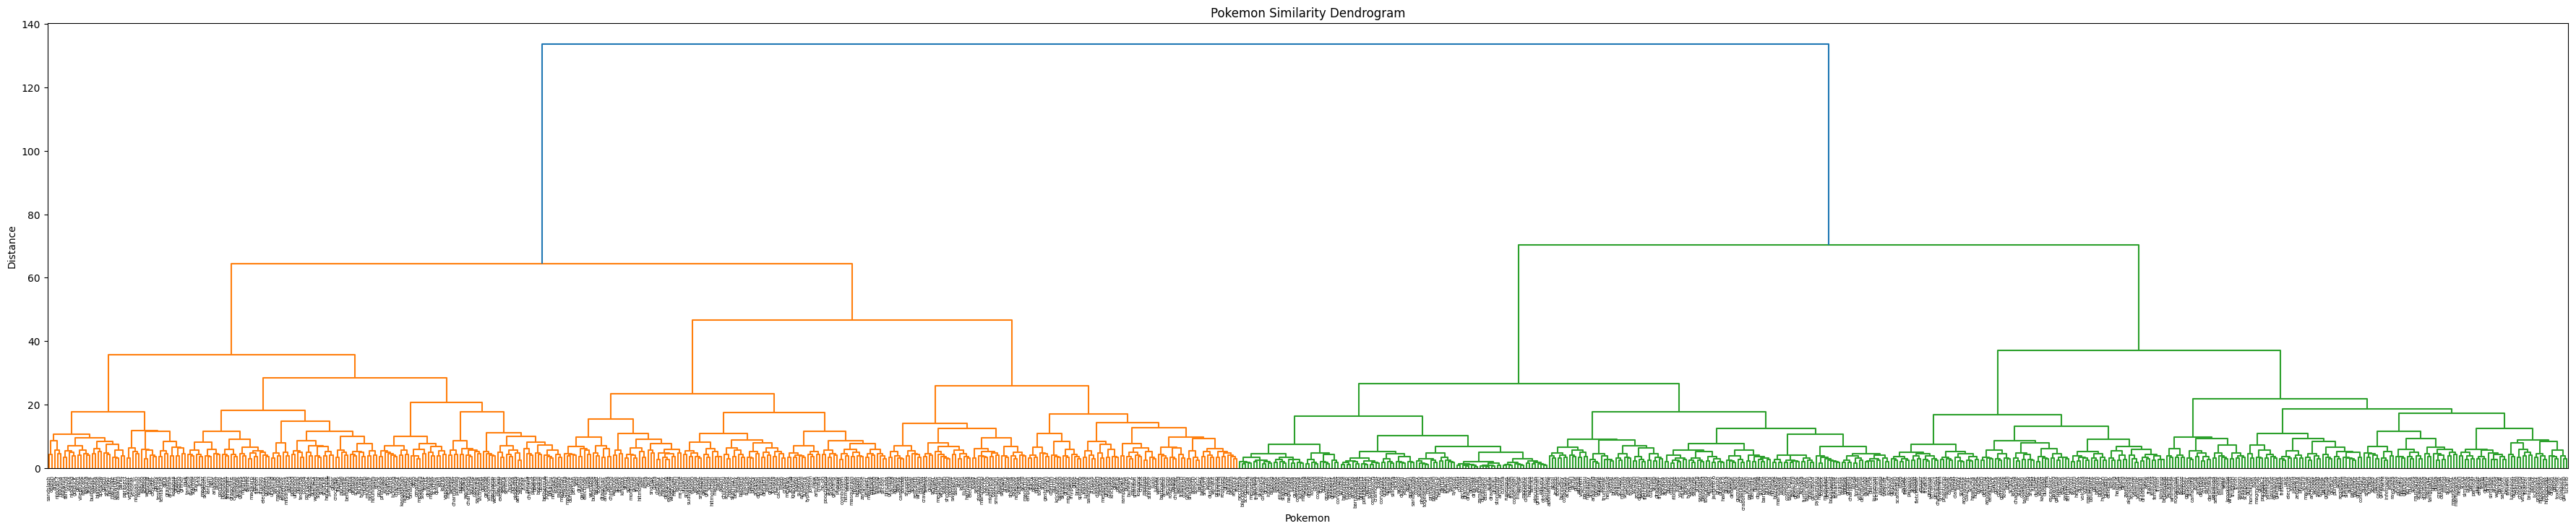

In [23]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Load the similarity data from file
similarity_matrix = pd.read_csv('gs_similarity_matrix.csv', index_col=0)

# Set the upper triangular part of the matrix to 0
similarity_matrix = similarity_matrix + np.triu(similarity_matrix, k=1)

# Convert the similarity matrix to a distance matrix
distance_matrix = 1 - similarity_matrix.to_numpy()

# Create the linkage matrix using Ward's method
linkage_matrix = linkage(distance_matrix, method='ward')

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(45, 8))
dendrogram(linkage_matrix, labels=similarity_matrix.index, leaf_rotation=90, ax=ax)
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
plt.title('Pokemon Similarity Dendrogram')
plt.xlabel('Pokemon')
plt.ylabel('Distance')
plt.show()
# Save the figure as a high-quality SVG file
fig.savefig('pokemon_gs_similarity_dendrogram.svg', format='svg', dpi=24000, bbox_inches='tight')


# Using SSIM similarity 

In [17]:
import pandas as pd

# Load the similarity data from file
similarity_df = pd.read_csv('ssim_similarity.txt', sep=',', header=None, names=['pokemon1', 'pokemon2', 'similarity'])

# Remove repeating pairs and self-similarity
similarity_df = similarity_df[similarity_df['pokemon1'] != similarity_df['pokemon2']]
similarity_df = similarity_df.drop_duplicates()

# Get a unique list of all Pokemon names
all_pokemon = similarity_df['pokemon1'].unique()

# Create an empty similarity matrix
similarity_matrix = pd.DataFrame(index=all_pokemon, columns=all_pokemon)

# Fill the similarity matrix with similarity scores
for i, row in similarity_df.iterrows():
    similarity_matrix.loc[row['pokemon1'], row['pokemon2']] = row['similarity']

# Replace missing values with 0 (when two Pokemon don't have a similarity score)
similarity_matrix = similarity_matrix.fillna(0)

# Convert the similarity matrix to a numpy array
similarity_array = similarity_matrix.to_numpy()

# Save as csv
similarity_matrix.to_csv('ssim_similarity_matrix.csv')


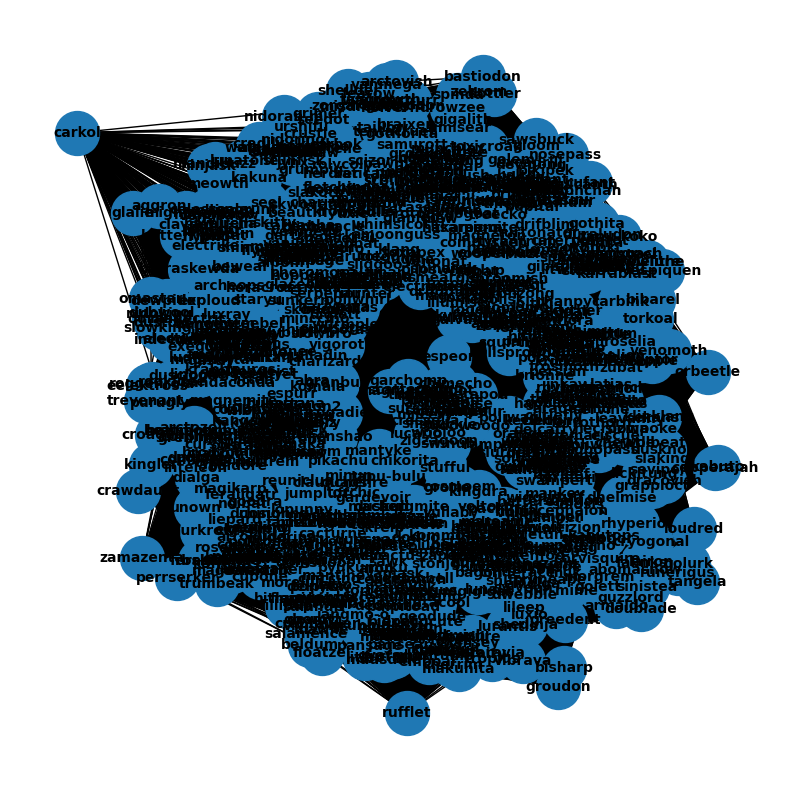

In [8]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load the similarity data from file
similarity_df = pd.read_csv('ssim_similarity_matrix.csv', index_col=0)

# Filter out non-significant edges
threshold = 0.5
similarity_df[similarity_df < threshold] = 0

# Create a graph from the similarity data
G = nx.from_numpy_array(similarity_df.values)

# Set the node labels
node_labels = dict(zip(range(len(similarity_df.index)), similarity_df.index))
nx.relabel_nodes(G, node_labels, copy=False)

# Remove nodes with no edges
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, with_labels=True, node_size=1000, font_size=10, font_weight='bold')
plt.axis('off')
plt.show()


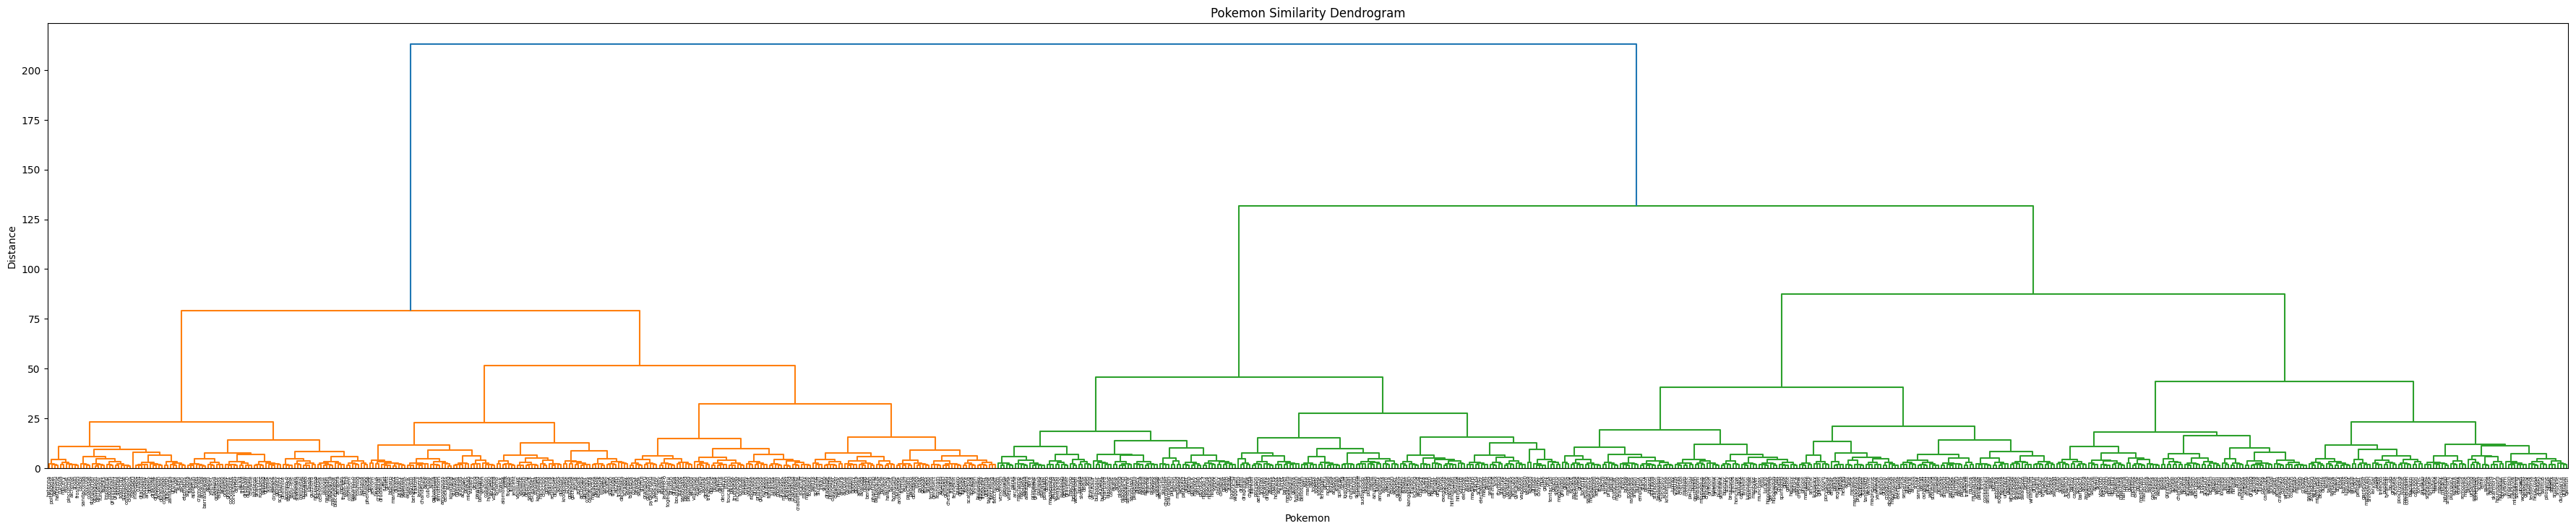

In [19]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Load the similarity data from file
similarity_matrix = pd.read_csv('ssim_similarity_matrix.csv', index_col=0)

# Set the upper triangular part of the matrix to 0
similarity_matrix = similarity_matrix + np.triu(similarity_matrix, k=1)

# Convert the similarity matrix to a distance matrix
distance_matrix = 1 - similarity_matrix.to_numpy()

# Create the linkage matrix using Ward's method
linkage_matrix = linkage(distance_matrix, method='ward')

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(45, 8))
dendrogram(linkage_matrix, labels=similarity_matrix.index, leaf_rotation=90, ax=ax)
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
plt.title('Pokemon Similarity Dendrogram')
plt.xlabel('Pokemon')
plt.ylabel('Distance')
plt.show()
# Save the figure as a high-quality SVG file
fig.savefig('pokemon_ssim_similarity_dendrogram.svg', format='svg', dpi=24000, bbox_inches='tight')


# Redundant code

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load the similarity data from file
similarity_df = pd.read_csv('gs_similarity.txt', sep=',', header=None, names=['pokemon1', 'pokemon2', 'similarity'])

# Filter out non-significant edges
threshold = 0.6
similarity_df = similarity_df[similarity_df['similarity'] >= threshold]

# Create a graph from the similarity data
G = nx.from_pandas_edgelist(similarity_df, 'pokemon1', 'pokemon2', 'similarity')

# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, with_labels=True, node_size=1000, font_size=10, font_weight='bold')
plt.axis('off')
plt.show()
